In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_union, make_pipeline
from sklearn import preprocessing


import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
#Reading csv file
df = pd.read_csv('final_result.csv', skipinitialspace = True)

# 1. EDA 

In [3]:
# cleaning whitespaces 

df.columns = [column.strip() for column in df.columns]
df.columns

Index(['Pos', 'Channel', 'Views', 'Subscriber', 'Vidoes', 'Published',
       'SOCIAL_BLADE_RANK', 'VIDEO_VIEWS_RANK', 'COUNTRY_RANK', 'MUSIC_RANK',
       'ESTIMATED_MONTHLY_EARNINGS', 'ESTIMATED_YEARLY_EARNINGS',
       'SUBSCRIBERS_FOR_THE_LAST_30_DAYS', 'VIDEO_VIEWS_FOR_THE_LAST_30_DAYS',
       'CHANNEL_TYPE'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Pos                               1024 non-null   int64 
 1   Channel                           1024 non-null   object
 2   Views                             1024 non-null   object
 3   Subscriber                        1020 non-null   object
 4   Vidoes                            1024 non-null   object
 5   Published                         1024 non-null   object
 6   SOCIAL_BLADE_RANK                 1020 non-null   object
 7   VIDEO_VIEWS_RANK                  1020 non-null   object
 8   COUNTRY_RANK                      1020 non-null   object
 9   MUSIC_RANK                        1020 non-null   object
 10  ESTIMATED_MONTHLY_EARNINGS        1020 non-null   object
 11  ESTIMATED_YEARLY_EARNINGS         1020 non-null   object
 12  SUBSCRIBERS_FOR_THE_

In [5]:
df

,Pos,Channel,Views,Subscriber,Vidoes,Published,SOCIAL_BLADE_RANK,VIDEO_VIEWS_RANK,COUNTRY_RANK,MUSIC_RANK,ESTIMATED_MONTHLY_EARNINGS,ESTIMATED_YEARLY_EARNINGS,SUBSCRIBERS_FOR_THE_LAST_30_DAYS,VIDEO_VIEWS_FOR_THE_LAST_30_DAYS,CHANNEL_TYPE
0,1,T-Series,"157,452,055,214","185,000,000","15,528",2006-03-13,6th,1st,1st,1st,$585K - $9.4M,$7M - $112.3M,2M 33.3%,2.34B 33.9%,Music
1,2,Cocomelon - Nursery Rhymes,"103,803,532,922","113,000,000",654,2006-09-01,8th,2nd,1st,1st,$383.1K - $6.1M,$4.6M - $73.5M,1M 0.0%,1.532B 10.1%,Education
2,3,SET India,"90,768,285,232","107,000,000","59,421",2006-09-20,7th,3rd,2nd,1st,$593K - $9.5M,$7.1M - $113.9M,2M 33.3%,2.372B 5.1%,Entertainment
3,4,WWE,"59,710,652,499","78,500,000","55,466",2007-05-11,27th,5th,4th,1st,$178.3K - $2.9M,$2.1M - $34.2M,700K 46.2%,713.04M 28.6%,Sports
4,5,Like Nastya,"58,866,363,302","74,700,000",589,2016-12-06,28th,7th,5th,2nd,$149.5K - $2.4M,$1.8M - $28.7M,500K 16.7%,597.852M 18.5%,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,996,또봇 V · 메탈리온 [Tobot V · Metalions],"2,682,725,344","2,180,000","1,826",2012-02-22,"17,495th","1,772nd",187th,589th,$3.1K - $49.6K,$37.2K - $595.3K,--,12.401M 4.7%,Film
1020,997,planbVEVO,"2,676,225,036","2,760,000",22,2010-06-01,"16,205th","1,774th","2,053rd","1,288th",$3.5K - $55.7K,$41.8K - $668.5K,--,13.926M 2.0%,Music
1021,998,TheSoundYouNeed,"2,668,983,641","5,580,000",448,2012-12-19,"14,051st","1,784th",30th,524th,$3.2K - $51.5K,$38.6K - $617.5K,--,12.865M 10%,Music
1022,999,Ch3Thailand Music,"2,667,414,719","3,880,000",680,2013-11-07,"9,183rd","1,755th",81st,798th,$4.2K - $67.6K,$50.7K - $811.3K,20K 0.0%,16.902M 13.5%,Music


In [6]:
#drop duplicate

df.drop_duplicates( inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1023
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Pos                               1000 non-null   int64 
 1   Channel                           1000 non-null   object
 2   Views                             1000 non-null   object
 3   Subscriber                        996 non-null    object
 4   Vidoes                            1000 non-null   object
 5   Published                         1000 non-null   object
 6   SOCIAL_BLADE_RANK                 996 non-null    object
 7   VIDEO_VIEWS_RANK                  996 non-null    object
 8   COUNTRY_RANK                      996 non-null    object
 9   MUSIC_RANK                        996 non-null    object
 10  ESTIMATED_MONTHLY_EARNINGS        996 non-null    object
 11  ESTIMATED_YEARLY_EARNINGS         996 non-null    object
 12  SUBSCRIBERS_FOR_THE_

In [7]:
# convert from object to folat 
list1 = []
for i in df['Views'].values:
    list1.append(i.replace(',',''))

df1 = pd.DataFrame(list1, columns = ['Views'])  
df['Views'] = df1['Views'].astype(float)

In [8]:
# convert from object to folat 
list1 = []
for i in df['Vidoes'].values:
    list1.append(i.replace(',',''))

df2 = pd.DataFrame(list1, columns = ['Vidoes'])  
df['Vidoes'] = df2['Vidoes'].astype(float)

In [9]:
# convert from object to folat 
df['Subscriber'] = df['Subscriber'].str.replace(",","").astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1023
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Pos                               1000 non-null   int64  
 1   Channel                           1000 non-null   object 
 2   Views                             976 non-null    float64
 3   Subscriber                        996 non-null    float64
 4   Vidoes                            976 non-null    float64
 5   Published                         1000 non-null   object 
 6   SOCIAL_BLADE_RANK                 996 non-null    object 
 7   VIDEO_VIEWS_RANK                  996 non-null    object 
 8   COUNTRY_RANK                      996 non-null    object 
 9   MUSIC_RANK                        996 non-null    object 
 10  ESTIMATED_MONTHLY_EARNINGS        996 non-null    object 
 11  ESTIMATED_YEARLY_EARNINGS         996 non-null    object 
 12  SUBSCR

In [11]:
new_df = df['ESTIMATED_MONTHLY_EARNINGS'].str.split("\xa0-\xa0",n = 1, expand = True)
new_df.columns= ['ESTIMATED_MONTHLY_EARNINGS_MIN','ESTIMATED_MONTHLY_EARNINGS_MAX']
df = pd.concat([df, new_df], axis=1)

In [12]:
new_df = df['ESTIMATED_YEARLY_EARNINGS'].str.split("\xa0-\xa0",n = 1, expand = True)
new_df.columns= ['ESTIMATED_YEARLY_EARNINGS_MIN','ESTIMATED_YEARLY_EARNINGS_MAX']
df = pd.concat([df, new_df], axis=1)

In [13]:
df['ESTIMATED_MONTHLY_EARNINGS_MIN'] = df['ESTIMATED_MONTHLY_EARNINGS_MIN'].str.replace('$','',regex=True)
df['ESTIMATED_MONTHLY_EARNINGS_MIN'] = df['ESTIMATED_MONTHLY_EARNINGS_MIN'].fillna(0)
df['ESTIMATED_MONTHLY_EARNINGS_MAX'] = df['ESTIMATED_MONTHLY_EARNINGS_MAX'].str.replace('$','',regex=True)
df['ESTIMATED_MONTHLY_EARNINGS_MAX'] = df['ESTIMATED_MONTHLY_EARNINGS_MAX'].fillna(0)

In [14]:
df['ESTIMATED_YEARLY_EARNINGS_MIN'] = df['ESTIMATED_YEARLY_EARNINGS_MIN'].str.replace('$','',regex=True)
df['ESTIMATED_YEARLY_EARNINGS_MIN'] = df['ESTIMATED_YEARLY_EARNINGS_MIN'].fillna(0)
df['ESTIMATED_YEARLY_EARNINGS_MAX'] = df['ESTIMATED_YEARLY_EARNINGS_MAX'].str.replace('$','',regex=True)
df['ESTIMATED_YEARLY_EARNINGS_MAX'] = df['ESTIMATED_YEARLY_EARNINGS_MAX'].fillna(0)

In [15]:
df

,Pos,Channel,Views,Subscriber,Vidoes,Published,SOCIAL_BLADE_RANK,VIDEO_VIEWS_RANK,COUNTRY_RANK,MUSIC_RANK,ESTIMATED_MONTHLY_EARNINGS,ESTIMATED_YEARLY_EARNINGS,SUBSCRIBERS_FOR_THE_LAST_30_DAYS,VIDEO_VIEWS_FOR_THE_LAST_30_DAYS,CHANNEL_TYPE,ESTIMATED_MONTHLY_EARNINGS_MIN,ESTIMATED_MONTHLY_EARNINGS_MAX,ESTIMATED_YEARLY_EARNINGS_MIN,ESTIMATED_YEARLY_EARNINGS_MAX
0,1,T-Series,1.574521e+11,185000000.0,15528.0,2006-03-13,6th,1st,1st,1st,$585K - $9.4M,$7M - $112.3M,2M 33.3%,2.34B 33.9%,Music,585K,9.4M,7M,112.3M
1,2,Cocomelon - Nursery Rhymes,1.038035e+11,113000000.0,654.0,2006-09-01,8th,2nd,1st,1st,$383.1K - $6.1M,$4.6M - $73.5M,1M 0.0%,1.532B 10.1%,Education,383.1K,6.1M,4.6M,73.5M
2,3,SET India,9.076829e+10,107000000.0,59421.0,2006-09-20,7th,3rd,2nd,1st,$593K - $9.5M,$7.1M - $113.9M,2M 33.3%,2.372B 5.1%,Entertainment,593K,9.5M,7.1M,113.9M
3,4,WWE,5.971065e+10,78500000.0,55466.0,2007-05-11,27th,5th,4th,1st,$178.3K - $2.9M,$2.1M - $34.2M,700K 46.2%,713.04M 28.6%,Sports,178.3K,2.9M,2.1M,34.2M
4,5,Like Nastya,5.886636e+10,74700000.0,589.0,2016-12-06,28th,7th,5th,2nd,$149.5K - $2.4M,$1.8M - $28.7M,500K 16.7%,597.852M 18.5%,Entertainment,149.5K,2.4M,1.8M,28.7M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,996,또봇 V · 메탈리온 [Tobot V · Metalions],NaN,2180000.0,NaN,2012-02-22,"17,495th","1,772nd",187th,589th,$3.1K - $49.6K,$37.2K - $595.3K,--,12.401M 4.7%,Film,3.1K,49.6K,37.2K,595.3K
1020,997,planbVEVO,NaN,2760000.0,NaN,2010-06-01,"16,205th","1,774th","2,053rd","1,288th",$3.5K - $55.7K,$41.8K - $668.5K,--,13.926M 2.0%,Music,3.5K,55.7K,41.8K,668.5K
1021,998,TheSoundYouNeed,NaN,5580000.0,NaN,2012-12-19,"14,051st","1,784th",30th,524th,$3.2K - $51.5K,$38.6K - $617.5K,--,12.865M 10%,Music,3.2K,51.5K,38.6K,617.5K
1022,999,Ch3Thailand Music,NaN,3880000.0,NaN,2013-11-07,"9,183rd","1,755th",81st,798th,$4.2K - $67.6K,$50.7K - $811.3K,20K 0.0%,16.902M 13.5%,Music,4.2K,67.6K,50.7K,811.3K


In [16]:
def value_to_float(x):
    
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

In [17]:
df['ESTIMATED_MONTHLY_EARNINGS_MIN'] = df['ESTIMATED_MONTHLY_EARNINGS_MIN'].apply(value_to_float).astype(float)
df['ESTIMATED_MONTHLY_EARNINGS_MAX'] = df['ESTIMATED_MONTHLY_EARNINGS_MAX'].apply(value_to_float).astype(float)
df['ESTIMATED_YEARLY_EARNINGS_MIN'] = df['ESTIMATED_YEARLY_EARNINGS_MIN'].apply(value_to_float).astype(float)
df['ESTIMATED_YEARLY_EARNINGS_MAX'] = df['ESTIMATED_YEARLY_EARNINGS_MAX'].apply(value_to_float).astype(float)

In [18]:
df

,Pos,Channel,Views,Subscriber,Vidoes,Published,SOCIAL_BLADE_RANK,VIDEO_VIEWS_RANK,COUNTRY_RANK,MUSIC_RANK,ESTIMATED_MONTHLY_EARNINGS,ESTIMATED_YEARLY_EARNINGS,SUBSCRIBERS_FOR_THE_LAST_30_DAYS,VIDEO_VIEWS_FOR_THE_LAST_30_DAYS,CHANNEL_TYPE,ESTIMATED_MONTHLY_EARNINGS_MIN,ESTIMATED_MONTHLY_EARNINGS_MAX,ESTIMATED_YEARLY_EARNINGS_MIN,ESTIMATED_YEARLY_EARNINGS_MAX
0,1,T-Series,1.574521e+11,185000000.0,15528.0,2006-03-13,6th,1st,1st,1st,$585K - $9.4M,$7M - $112.3M,2M 33.3%,2.34B 33.9%,Music,585000.0,9400000.0,7000000.0,112300000.0
1,2,Cocomelon - Nursery Rhymes,1.038035e+11,113000000.0,654.0,2006-09-01,8th,2nd,1st,1st,$383.1K - $6.1M,$4.6M - $73.5M,1M 0.0%,1.532B 10.1%,Education,383100.0,6100000.0,4600000.0,73500000.0
2,3,SET India,9.076829e+10,107000000.0,59421.0,2006-09-20,7th,3rd,2nd,1st,$593K - $9.5M,$7.1M - $113.9M,2M 33.3%,2.372B 5.1%,Entertainment,593000.0,9500000.0,7100000.0,113900000.0
3,4,WWE,5.971065e+10,78500000.0,55466.0,2007-05-11,27th,5th,4th,1st,$178.3K - $2.9M,$2.1M - $34.2M,700K 46.2%,713.04M 28.6%,Sports,178300.0,2900000.0,2100000.0,34200000.0
4,5,Like Nastya,5.886636e+10,74700000.0,589.0,2016-12-06,28th,7th,5th,2nd,$149.5K - $2.4M,$1.8M - $28.7M,500K 16.7%,597.852M 18.5%,Entertainment,149500.0,2400000.0,1800000.0,28700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,996,또봇 V · 메탈리온 [Tobot V · Metalions],NaN,2180000.0,NaN,2012-02-22,"17,495th","1,772nd",187th,589th,$3.1K - $49.6K,$37.2K - $595.3K,--,12.401M 4.7%,Film,3100.0,49600.0,37200.0,595300.0
1020,997,planbVEVO,NaN,2760000.0,NaN,2010-06-01,"16,205th","1,774th","2,053rd","1,288th",$3.5K - $55.7K,$41.8K - $668.5K,--,13.926M 2.0%,Music,3500.0,55700.0,41800.0,668500.0
1021,998,TheSoundYouNeed,NaN,5580000.0,NaN,2012-12-19,"14,051st","1,784th",30th,524th,$3.2K - $51.5K,$38.6K - $617.5K,--,12.865M 10%,Music,3200.0,51500.0,38600.0,617500.0
1022,999,Ch3Thailand Music,NaN,3880000.0,NaN,2013-11-07,"9,183rd","1,755th",81st,798th,$4.2K - $67.6K,$50.7K - $811.3K,20K 0.0%,16.902M 13.5%,Music,4200.0,67600.0,50700.0,811300.0


In [19]:
new_df = df['SUBSCRIBERS_FOR_THE_LAST_30_DAYS'].str.split(" ",n = 1, expand = True)
new_df.columns= ['SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new', 'SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new_']
df = pd.concat([df, new_df], axis=1)

In [20]:
new_df = df['VIDEO_VIEWS_FOR_THE_LAST_30_DAYS'].str.split(" ",n = 1, expand = True)
new_df.columns= ['VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new', 'VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new_']
df = pd.concat([df, new_df], axis=1)

In [21]:
df.isnull().sum()

Pos                                        0
Channel                                    0
Views                                     24
Subscriber                                 4
Vidoes                                    24
Published                                  0
SOCIAL_BLADE_RANK                          4
VIDEO_VIEWS_RANK                           4
COUNTRY_RANK                               4
MUSIC_RANK                                 4
ESTIMATED_MONTHLY_EARNINGS                 4
ESTIMATED_YEARLY_EARNINGS                  4
SUBSCRIBERS_FOR_THE_LAST_30_DAYS           4
VIDEO_VIEWS_FOR_THE_LAST_30_DAYS           4
CHANNEL_TYPE                               7
ESTIMATED_MONTHLY_EARNINGS_MIN             0
ESTIMATED_MONTHLY_EARNINGS_MAX             0
ESTIMATED_YEARLY_EARNINGS_MIN              0
ESTIMATED_YEARLY_EARNINGS_MAX              0
SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new       4
SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new_    226
VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new       4
VIDEO_VIEW

In [22]:
df = df.dropna()

In [23]:
df.isnull().sum()

Pos                                      0
Channel                                  0
Views                                    0
Subscriber                               0
Vidoes                                   0
Published                                0
SOCIAL_BLADE_RANK                        0
VIDEO_VIEWS_RANK                         0
COUNTRY_RANK                             0
MUSIC_RANK                               0
ESTIMATED_MONTHLY_EARNINGS               0
ESTIMATED_YEARLY_EARNINGS                0
SUBSCRIBERS_FOR_THE_LAST_30_DAYS         0
VIDEO_VIEWS_FOR_THE_LAST_30_DAYS         0
CHANNEL_TYPE                             0
ESTIMATED_MONTHLY_EARNINGS_MIN           0
ESTIMATED_MONTHLY_EARNINGS_MAX           0
ESTIMATED_YEARLY_EARNINGS_MIN            0
ESTIMATED_YEARLY_EARNINGS_MAX            0
SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new     0
SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new_    0
VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new     0
VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new_    0
dtype: int6

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Pos                                    756 non-null    int64  
 1   Channel                                756 non-null    object 
 2   Views                                  756 non-null    float64
 3   Subscriber                             756 non-null    float64
 4   Vidoes                                 756 non-null    float64
 5   Published                              756 non-null    object 
 6   SOCIAL_BLADE_RANK                      756 non-null    object 
 7   VIDEO_VIEWS_RANK                       756 non-null    object 
 8   COUNTRY_RANK                           756 non-null    object 
 9   MUSIC_RANK                             756 non-null    object 
 10  ESTIMATED_MONTHLY_EARNINGS             756 non-null    object 
 11  ESTIMA

In [25]:
df['SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new'] = df['SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new'].apply(value_to_float).astype(float)
df['VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new'] = df['VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new'].apply(value_to_float).astype(float)

In [26]:
df.drop(['ESTIMATED_MONTHLY_EARNINGS', 'ESTIMATED_YEARLY_EARNINGS', 'SUBSCRIBERS_FOR_THE_LAST_30_DAYS',
         'VIDEO_VIEWS_FOR_THE_LAST_30_DAYS', 'SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new_',
         'VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new_'],axis = 1, inplace= True)
df.head()

,Pos,Channel,Views,Subscriber,Vidoes,Published,SOCIAL_BLADE_RANK,VIDEO_VIEWS_RANK,COUNTRY_RANK,MUSIC_RANK,CHANNEL_TYPE,ESTIMATED_MONTHLY_EARNINGS_MIN,ESTIMATED_MONTHLY_EARNINGS_MAX,ESTIMATED_YEARLY_EARNINGS_MIN,ESTIMATED_YEARLY_EARNINGS_MAX,SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new,VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new
0,1,T-Series,1.574521e+11,185000000.0,15528.0,2006-03-13,6th,1st,1st,1st,Music,585000.0,9400000.0,7000000.0,112300000.0,2000000.0,2.340000e+09
1,2,Cocomelon - Nursery Rhymes,1.038035e+11,113000000.0,654.0,2006-09-01,8th,2nd,1st,1st,Education,383100.0,6100000.0,4600000.0,73500000.0,1000000.0,1.532000e+09
2,3,SET India,9.076829e+10,107000000.0,59421.0,2006-09-20,7th,3rd,2nd,1st,Entertainment,593000.0,9500000.0,7100000.0,113900000.0,2000000.0,2.372000e+09
3,4,WWE,5.971065e+10,78500000.0,55466.0,2007-05-11,27th,5th,4th,1st,Sports,178300.0,2900000.0,2100000.0,34200000.0,700000.0,7.130400e+08
4,5,Like Nastya,5.886636e+10,74700000.0,589.0,2016-12-06,28th,7th,5th,2nd,Entertainment,149500.0,2400000.0,1800000.0,28700000.0,500000.0,5.978520e+08


## Adding new Feature 

In [27]:
# Getting the Average monthly and yearly earning out of min and max


df['Avg_Monlthy_Earning'] = ((df.ESTIMATED_MONTHLY_EARNINGS_MAX + df.ESTIMATED_MONTHLY_EARNINGS_MIN) / 2).astype(float)
df['Avg_yearly_Earning'] = ((df.ESTIMATED_YEARLY_EARNINGS_MAX + df.ESTIMATED_YEARLY_EARNINGS_MIN) / 2).astype(float)

In [28]:
df

,Pos,Channel,Views,Subscriber,Vidoes,Published,SOCIAL_BLADE_RANK,VIDEO_VIEWS_RANK,COUNTRY_RANK,MUSIC_RANK,CHANNEL_TYPE,ESTIMATED_MONTHLY_EARNINGS_MIN,ESTIMATED_MONTHLY_EARNINGS_MAX,ESTIMATED_YEARLY_EARNINGS_MIN,ESTIMATED_YEARLY_EARNINGS_MAX,SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new,VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new,Avg_Monlthy_Earning,Avg_yearly_Earning
0,1,T-Series,1.574521e+11,185000000.0,15528.0,2006-03-13,6th,1st,1st,1st,Music,585000.0,9400000.0,7000000.0,112300000.0,2000000.0,2.340000e+09,4992500.0,59650000.0
1,2,Cocomelon - Nursery Rhymes,1.038035e+11,113000000.0,654.0,2006-09-01,8th,2nd,1st,1st,Education,383100.0,6100000.0,4600000.0,73500000.0,1000000.0,1.532000e+09,3241550.0,39050000.0
2,3,SET India,9.076829e+10,107000000.0,59421.0,2006-09-20,7th,3rd,2nd,1st,Entertainment,593000.0,9500000.0,7100000.0,113900000.0,2000000.0,2.372000e+09,5046500.0,60500000.0
3,4,WWE,5.971065e+10,78500000.0,55466.0,2007-05-11,27th,5th,4th,1st,Sports,178300.0,2900000.0,2100000.0,34200000.0,700000.0,7.130400e+08,1539150.0,18150000.0
4,5,Like Nastya,5.886636e+10,74700000.0,589.0,2016-12-06,28th,7th,5th,2nd,Entertainment,149500.0,2400000.0,1800000.0,28700000.0,500000.0,5.978520e+08,1274750.0,15250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,972,Nuclear Blast Records,2.682725e+09,2660000.0,1826.0,2006-05-12,"8,580th","1,712th",70th,"1,302nd",Music,5700.0,91700.0,68800.0,1100000.0,20000.0,2.291800e+07,48700.0,584400.0
996,973,レオンチャンネル,2.676225e+09,1410000.0,22.0,2012-04-30,"16,410th","1,740th",236th,"4,738th",Entertainment,3000.0,47300.0,35500.0,568100.0,10000.0,1.183500e+07,25150.0,301800.0
997,974,Cris Devil Gamer,2.668984e+09,9660000.0,448.0,2014-05-13,"7,457th","1,764th",4th,100th,Games,7500.0,120500.0,90300.0,1400000.0,50000.0,3.011500e+07,64000.0,745150.0
998,975,Galileo,2.667415e+09,3080000.0,680.0,2013-07-22,"9,643rd","1,741st",51st,"1,855th",Entertainment,3700.0,58900.0,44100.0,706300.0,10000.0,1.471500e+07,31300.0,375200.0


# Feature Selection 

In [29]:
#drop unnecessary columns 

df.drop(['ESTIMATED_MONTHLY_EARNINGS_MIN', 'ESTIMATED_MONTHLY_EARNINGS_MAX', 'ESTIMATED_YEARLY_EARNINGS_MIN',
         'ESTIMATED_YEARLY_EARNINGS_MAX',
         'Avg_Monlthy_Earning','Published'],axis = 1, inplace= True)
df.head()

,Pos,Channel,Views,Subscriber,Vidoes,SOCIAL_BLADE_RANK,VIDEO_VIEWS_RANK,COUNTRY_RANK,MUSIC_RANK,CHANNEL_TYPE,SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new,VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new,Avg_yearly_Earning
0,1,T-Series,1.574521e+11,185000000.0,15528.0,6th,1st,1st,1st,Music,2000000.0,2.340000e+09,59650000.0
1,2,Cocomelon - Nursery Rhymes,1.038035e+11,113000000.0,654.0,8th,2nd,1st,1st,Education,1000000.0,1.532000e+09,39050000.0
2,3,SET India,9.076829e+10,107000000.0,59421.0,7th,3rd,2nd,1st,Entertainment,2000000.0,2.372000e+09,60500000.0
3,4,WWE,5.971065e+10,78500000.0,55466.0,27th,5th,4th,1st,Sports,700000.0,7.130400e+08,18150000.0
4,5,Like Nastya,5.886636e+10,74700000.0,589.0,28th,7th,5th,2nd,Entertainment,500000.0,5.978520e+08,15250000.0


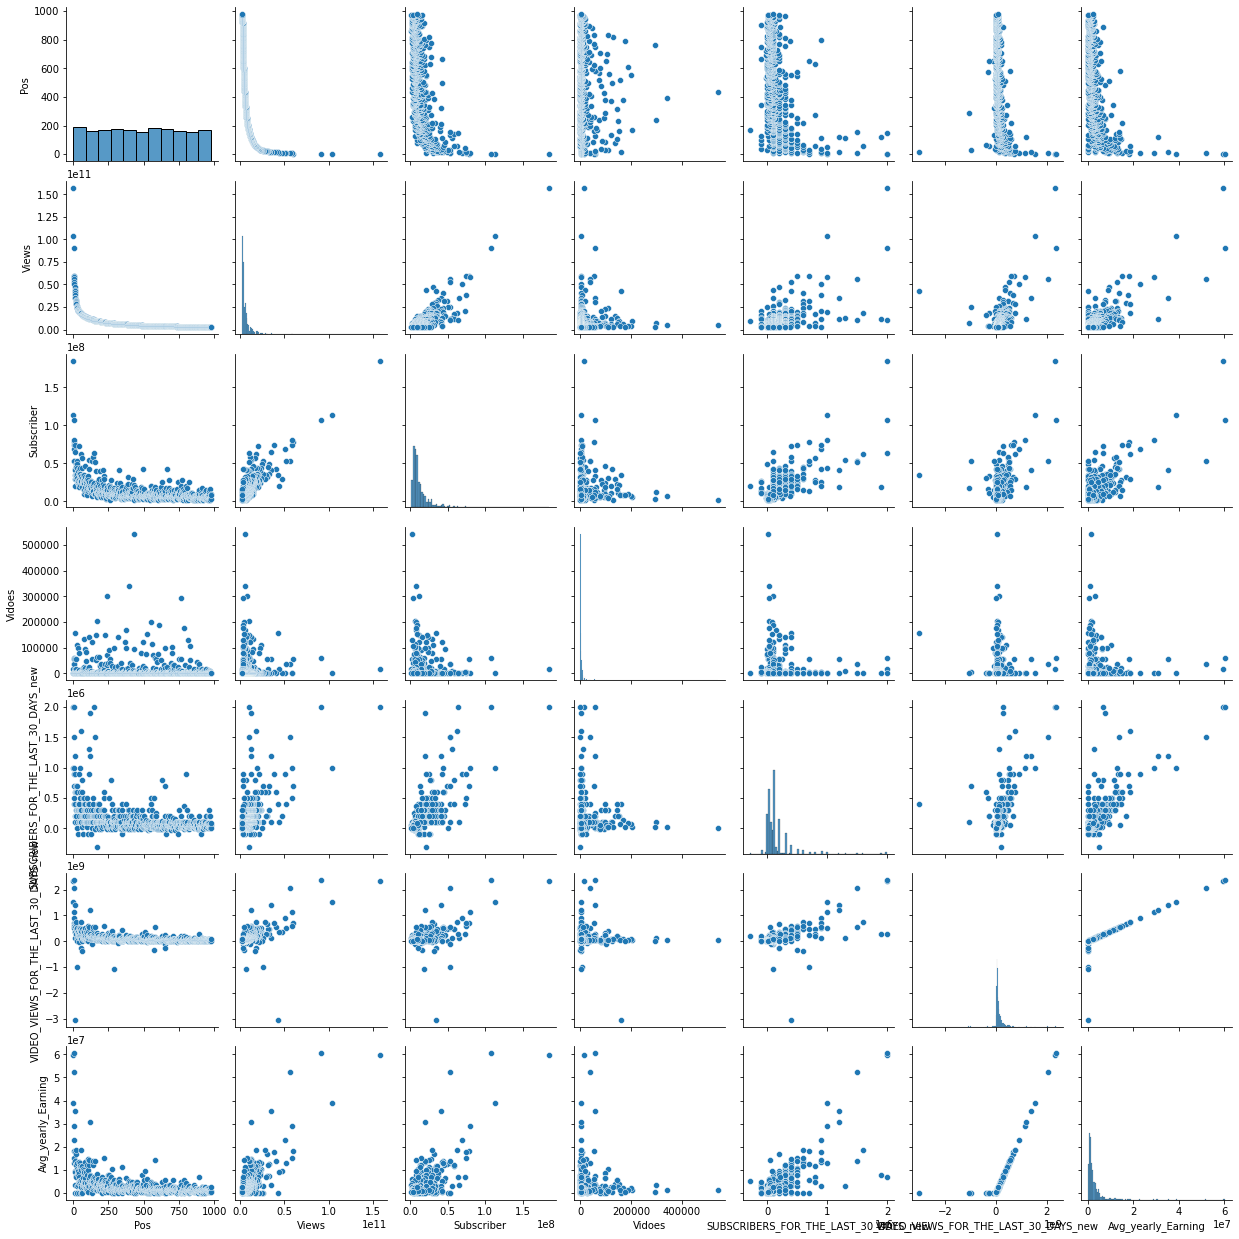

In [30]:
sns.pairplot(df);

In [31]:
df.corr()

,Pos,Views,Subscriber,Vidoes,SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new,VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new,Avg_yearly_Earning
Pos,1.000000,-0.553135,-0.540793,-0.082261,-0.397964,-0.324367,-0.442120
Views,-0.553135,1.000000,0.844670,0.055796,0.607733,0.608272,0.810188
Subscriber,-0.540793,0.844670,1.000000,0.024223,0.722266,0.544745,0.710010
Vidoes,-0.082261,0.055796,0.024223,1.000000,0.001253,-0.042869,0.020854
SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new,-0.397964,0.607733,0.722266,0.001253,1.000000,0.602289,0.765915
VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new,-0.324367,0.608272,0.544745,-0.042869,0.602289,1.000000,0.856731
Avg_yearly_Earning,-0.442120,0.810188,0.710010,0.020854,0.765915,0.856731,1.000000


<AxesSubplot:>

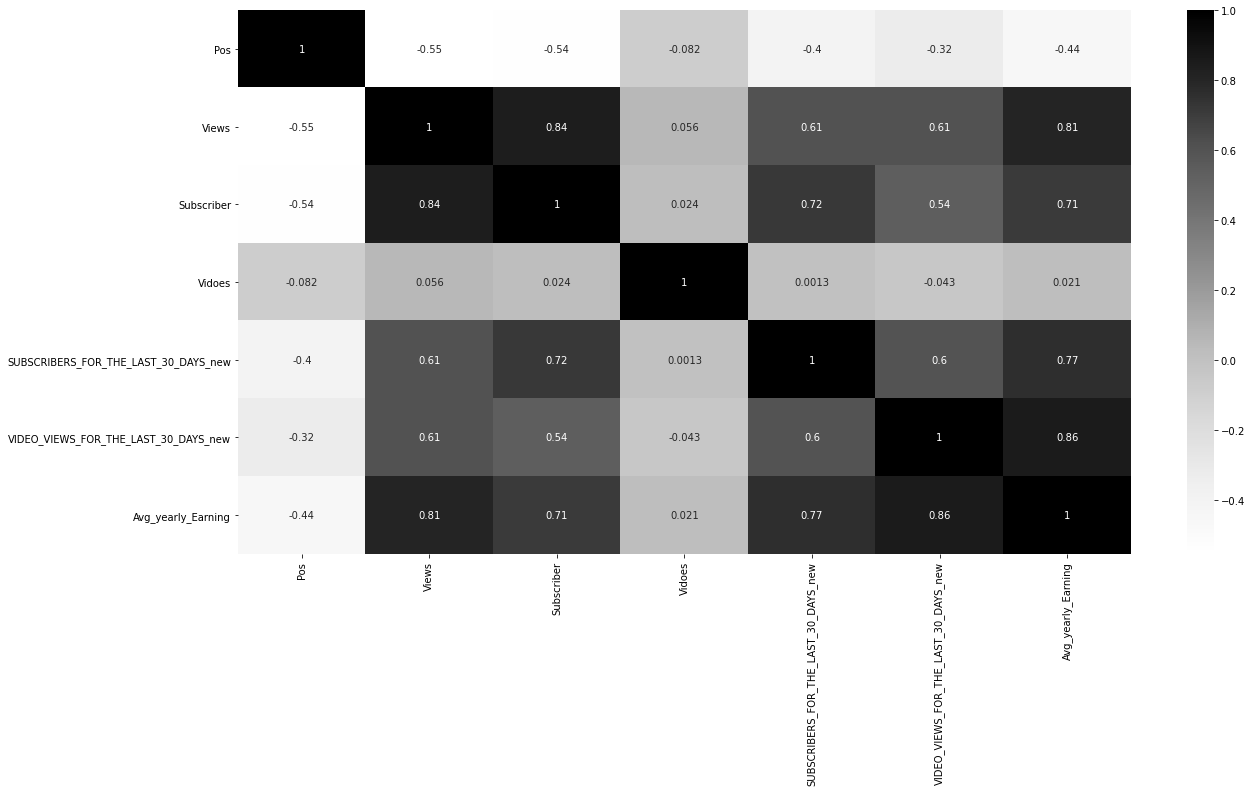

In [32]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, cmap='Greys')

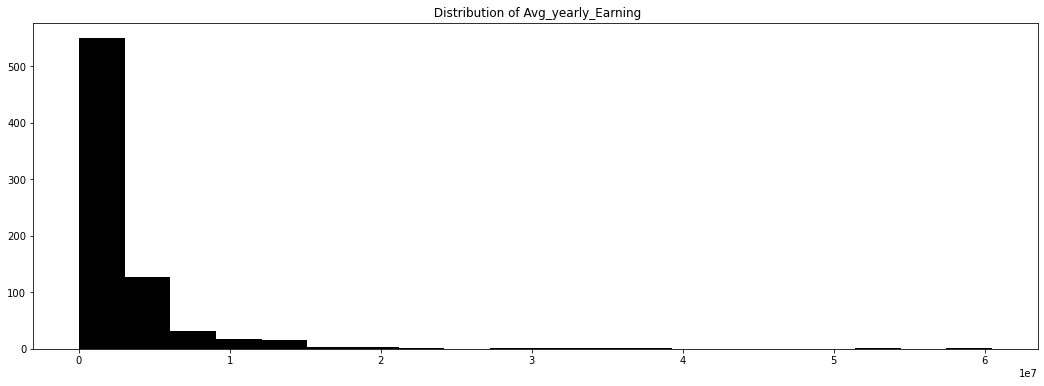

In [33]:
plt.figure(figsize=(18,6))
plt.hist(df.Avg_yearly_Earning, bins=20, color = 'black')
plt.title(' Distribution of Avg_yearly_Earning');

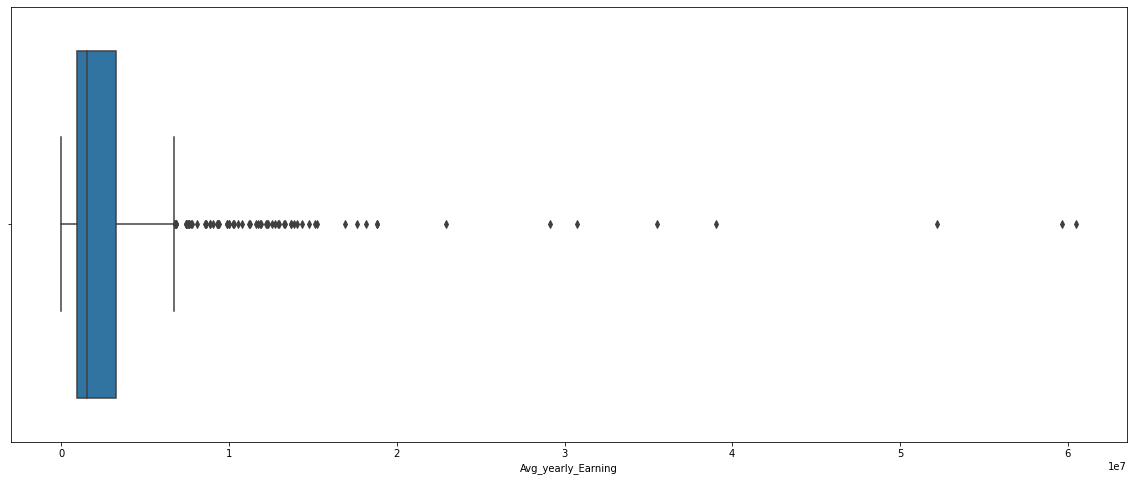

In [34]:
plt.figure(figsize=(20,8))
sns.boxplot(x = df['Avg_yearly_Earning']);

In [35]:
# Dealing with outliers from dependent variable (Avg_yearly_Earning)


Q1 = df['Avg_yearly_Earning'].quantile(0.25)
Q3 = df['Avg_yearly_Earning'].quantile(0.75)
IQR = Q3 - Q1 
df = df.loc[(df['Avg_yearly_Earning'] >= Q1 - 1.5 * IQR) & (df['Avg_yearly_Earning'] <= Q3 + 1.5 *IQR)]

In [36]:
df

,Pos,Channel,Views,Subscriber,Vidoes,SOCIAL_BLADE_RANK,VIDEO_VIEWS_RANK,COUNTRY_RANK,MUSIC_RANK,CHANNEL_TYPE,SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new,VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new,Avg_yearly_Earning
11,12,ABS-CBN Entertainment,4.286166e+10,34800000.0,159246.0,13th,13th,1st,17th,Entertainment,400000.0,-3.044000e+09,0.0
15,16,Canal KondZilla,3.480966e+10,64400000.0,1901.0,508th,16th,1st,6th,Music,100000.0,1.361100e+08,3454150.0
24,25,Get Movies,2.597953e+10,35700000.0,2986.0,644th,25th,1st,18th,Entertainment,100000.0,1.197090e+08,3029550.0
25,26,Shemaroo Filmi Gaane,2.535120e+10,52800000.0,7203.0,127th,28th,7th,9th,Music,700000.0,-9.898020e+08,0.0
26,27,Pinkfong! Kids' Songs & Stories,2.460155e+10,49700000.0,1857.0,"35,051,756th","5,589,431st",--,"660,588th",Entertainment,0.0,1.320900e+04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,972,Nuclear Blast Records,2.682725e+09,2660000.0,1826.0,"8,580th","1,712th",70th,"1,302nd",Music,20000.0,2.291800e+07,584400.0
996,973,レオンチャンネル,2.676225e+09,1410000.0,22.0,"16,410th","1,740th",236th,"4,738th",Entertainment,10000.0,1.183500e+07,301800.0
997,974,Cris Devil Gamer,2.668984e+09,9660000.0,448.0,"7,457th","1,764th",4th,100th,Games,50000.0,3.011500e+07,745150.0
998,975,Galileo,2.667415e+09,3080000.0,680.0,"9,643rd","1,741st",51st,"1,855th",Entertainment,10000.0,1.471500e+07,375200.0


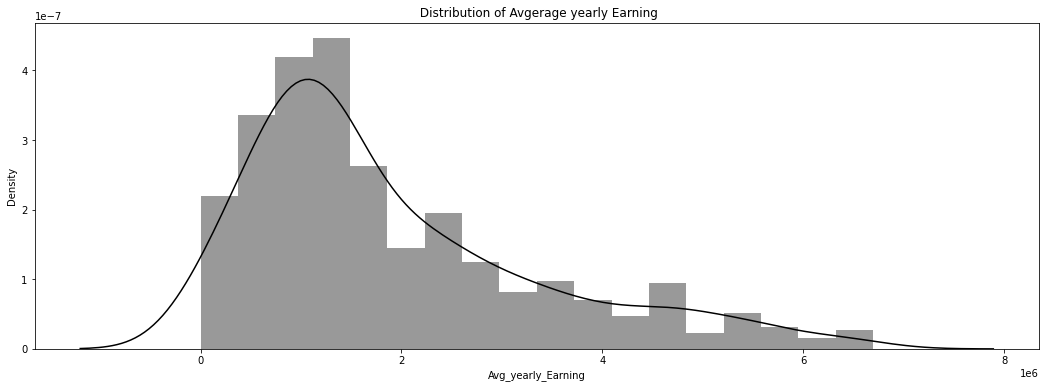

In [37]:
plt.figure(figsize=(18,6))
sns.distplot(df.Avg_yearly_Earning, color = 'black')
plt.title(' Distribution of Avgerage yearly Earning');


## Testing Linearity between independent and independents variables 

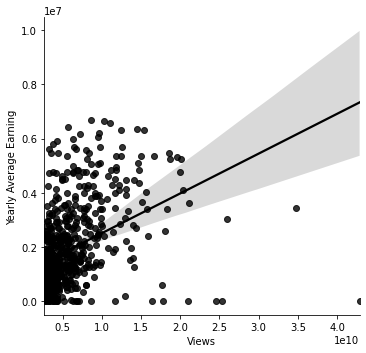

In [38]:
# Plot some features against Yearly average Earning
sns.lmplot(x= 'Views', y = 'Avg_yearly_Earning', data = df, order= 1, 
           scatter_kws={"color": "black"}, line_kws={"color": "black"})
plt.xlabel('Views')
plt.ylabel('Yearly Average Earning');

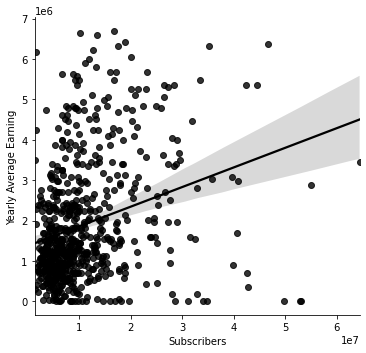

In [39]:
sns.lmplot(x= 'Subscriber', y = 'Avg_yearly_Earning', data = df, order= 1,
           scatter_kws={"color": "black"}, line_kws={"color": "black"})
plt.xlabel('Subscribers')
plt.ylabel('Yearly Average Earning');

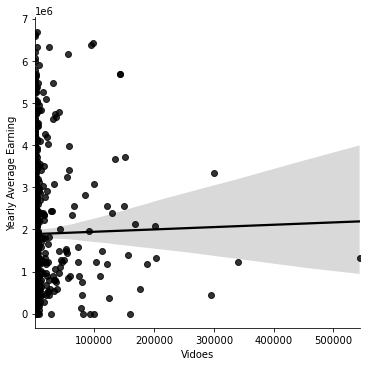

In [40]:
sns.lmplot(x= 'Vidoes', y = 'Avg_yearly_Earning', data = df, order= 1,
          scatter_kws={"color": "black"}, line_kws={"color": "black"})
plt.xlabel('Vidoes')
plt.ylabel('Yearly Average Earning');

## Log Transfromation to establish linear correlation between Y and features

In [41]:
df['log_Views'] = np.log(df['Views'])

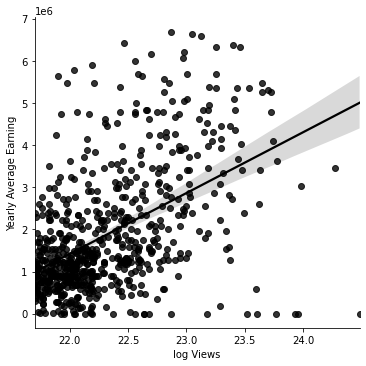

In [42]:
sns.lmplot(x= 'log_Views', y = 'Avg_yearly_Earning', data = df, order= 1, 
          scatter_kws={"color": "black"}, line_kws={"color": "black"})
plt.xlabel('log Views')
plt.ylabel('Yearly Average Earning');

In [43]:
df['log_Subscriber'] = np.log(df['Subscriber'])

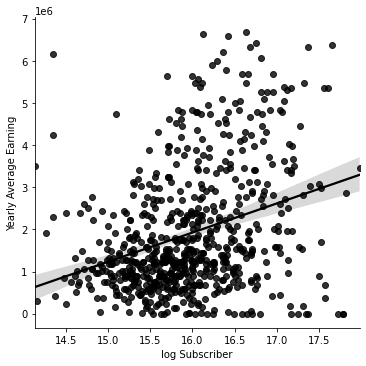

In [44]:
sns.lmplot(x= 'log_Subscriber', y = 'Avg_yearly_Earning', data = df, order= 1,
          scatter_kws={"color": "black"}, line_kws={"color": "black"})
plt.xlabel('log Subscriber')
plt.ylabel('Yearly Average Earning');

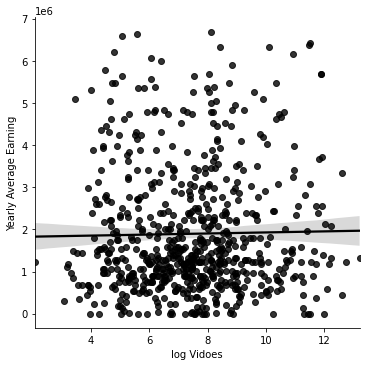

In [45]:
df['log_Vidoes'] = np.log(df['Vidoes'])
sns.lmplot(x= 'log_Vidoes', y = 'Avg_yearly_Earning', data = df, order= 1, 
           scatter_kws={"color": "black"}, line_kws={"color": "black"})
plt.xlabel('log Vidoes')
plt.ylabel('Yearly Average Earning');

In [46]:
df.drop(['Views', 'Subscriber', 'Vidoes'],axis = 1, inplace= True)

In [47]:
df.rename(columns = {'log_Views': 'Views', 'log_Subscriber':'Subscriber', 'log_Vidoes':'Vidoes'}, inplace= True)

In [48]:
df.CHANNEL_TYPE.unique()

array(['Entertainment', 'Music', 'Games', 'Film', 'Education', 'News',
       'Comedy', 'People', 'Sports', 'Howto', 'Nonprofit', 'Animals',
       'Tech', 'Autos'], dtype=object)

In [49]:
df.CHANNEL_TYPE.isnull().sum()

0

## Encoding categorical variables 

### Dummies 

### Encode the following  labels with value between 0 and n_classes-1

In [50]:
le = preprocessing.LabelEncoder()
le.fit(df.CHANNEL_TYPE)
df.CHANNEL_TYPE = list(le.transform(df.CHANNEL_TYPE)) 


In [51]:
le = preprocessing.LabelEncoder()
le.fit(df.COUNTRY_RANK)
df.COUNTRY_RANK = list(le.transform(df.COUNTRY_RANK)) 

In [52]:
le = preprocessing.LabelEncoder()
le.fit(df.Channel)
df.Channel = list(le.transform(df.Channel)) 

In [53]:
le = preprocessing.LabelEncoder()
le.fit(df.VIDEO_VIEWS_RANK)
df.VIDEO_VIEWS_RANK = list(le.transform(df.VIDEO_VIEWS_RANK))

In [54]:
le = preprocessing.LabelEncoder()
le.fit(df.SOCIAL_BLADE_RANK)
df.SOCIAL_BLADE_RANK = list(le.transform(df.SOCIAL_BLADE_RANK))

In [55]:
le = preprocessing.LabelEncoder()
le.fit(df.MUSIC_RANK)
df.MUSIC_RANK = list(le.transform(df.MUSIC_RANK))

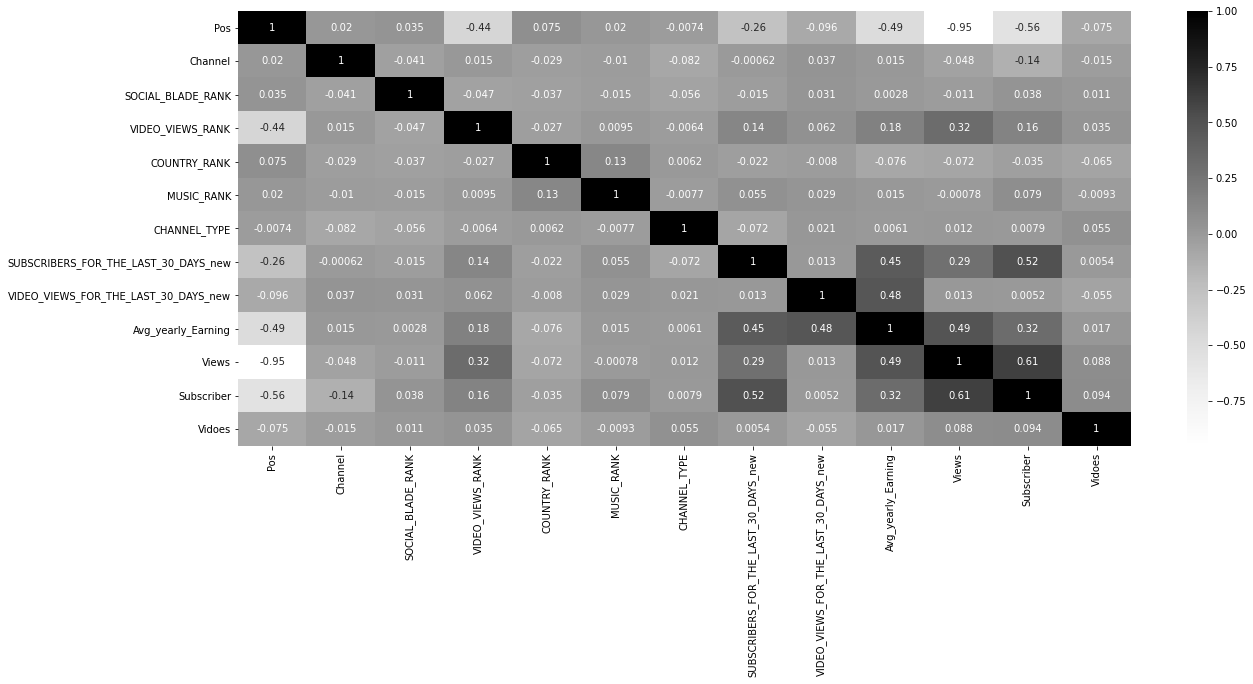

In [56]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True, cmap='Greys');

In [57]:
df

,Pos,Channel,SOCIAL_BLADE_RANK,VIDEO_VIEWS_RANK,COUNTRY_RANK,MUSIC_RANK,CHANNEL_TYPE,SUBSCRIBERS_FOR_THE_LAST_30_DAYS_new,VIDEO_VIEWS_FOR_THE_LAST_30_DAYS_new,Avg_yearly_Earning,Views,Subscriber,Vidoes
11,12,13,156,279,93,104,4,400000.0,-3.044000e+09,0.0,24.481244,17.365128,11.978205
15,16,81,517,292,93,389,8,100000.0,1.361100e+08,3454150.0,24.273161,17.980624,7.550135
24,25,196,561,331,93,110,4,100000.0,1.197090e+08,3029550.0,23.980575,17.390661,8.001690
25,26,453,150,350,294,457,8,700000.0,-9.898020e+08,0.0,23.956092,17.782022,8.882253
26,27,395,380,451,0,375,4,0.0,1.320900e+04,0.0,23.926075,17.721515,7.526718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,972,367,624,257,277,21,8,20000.0,2.291800e+07,584400.0,21.710099,14.793837,7.509883
996,973,670,165,258,115,262,4,10000.0,1.183500e+07,301800.0,21.707673,14.159100,3.091042
997,974,108,586,260,218,43,6,50000.0,3.011500e+07,745150.0,21.704964,16.083504,6.104793
998,975,188,661,259,223,40,4,10000.0,1.471500e+07,375200.0,21.704376,14.940440,6.522093


# Fitting Regression Model 

In [58]:
#Defining our variables 
y = df['Avg_yearly_Earning']
X = df.drop(['Avg_yearly_Earning'], axis = 1)

# perform train/val split
#Split the data 60 - 20 - 20 train/val/test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20) 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25)

## 1-  Linear regression 

In [59]:
def Linear_Regression(X_train, y_train, X_val, y_val):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_val)

    #plt.scatter(y_val, y_pred)
    #plt.hist(y_val - y_pred)

    r_squared = lr.score(X_val, y_val)
    MAE = metrics.mean_absolute_error(y_val, y_pred)
    MSE = metrics.mean_squared_error(y_val, y_pred)
    RMSE = np.sqrt(MSE)
    sns.regplot(x= y_val, y = y_pred, data = df, order= 1, color = 'k')
    return [r_squared,MAE,MSE, RMSE]


# Imporoving Linear Regression 

## + Polynomial Features 

In [60]:
def Poly_2(X_train, y_train, X_val, y_val, degree):
    plr_1 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    plr_1.fit(X_train, y_train)

    y_pred = plr_1.predict(X_val)

    r_squared = plr_1.score(X_val, y_val)
    MAE = metrics.mean_absolute_error(y_val, y_pred)
    MSE = metrics.mean_squared_error(y_val, y_pred)
    RMSE = np.sqrt(MSE)
    sns.regplot(x= y_val, y = y_pred, data = df, order= 1, color = 'k')
    return [r_squared,MAE,MSE, RMSE]

In [61]:
def Poly_3(X_train, y_train, X_val, y_val, degree):
    plr_1 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    plr_1.fit(X_train, y_train)

    y_pred = plr_1.predict(X_val)

    r_squared = plr_1.score(X_val, y_val)
    MAE = metrics.mean_absolute_error(y_val, y_pred)
    MSE = metrics.mean_squared_error(y_val, y_pred)
    RMSE = np.sqrt(MSE)
    return [r_squared,MAE,MSE, RMSE]

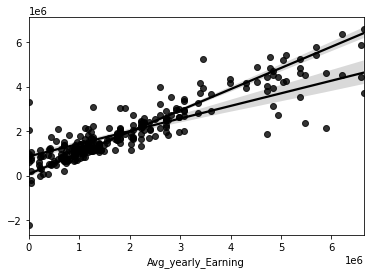

In [62]:
Linear_Regression = Linear_Regression(X_train, y_train, X_val, y_val)
Poly_2 = Poly_2(X_train, y_train, X_val, y_val, 4)

In [63]:
Poly_3 = Poly_3(X_train, y_train, X_val, y_val, 5)

In [73]:
final_decision = pd.DataFrame(data = [Linear_Regression, Poly_2, Poly_3], 
                              columns= ['r_squared','MAE','MSE', 'RMSE'], 
                              index = ['Linear Regression', 'Polynomial degree 4' ,'Polynomial degree 5'])

In [74]:
final_decision

,r_squared,MAE,MSE,RMSE
Linear Regression,0.634396,653861.543143,8.949487e+11,9.460173e+05
Polynomial degree 4,0.951278,221565.225829,1.192647e+11,3.453473e+05
Polynomial degree 5,0.299057,787351.038821,1.715812e+12,1.309890e+06


## Regulization

In [66]:
def GridSearch(model, X_train_val, y_train_val):
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    params = {"alpha": np.linspace(0, 1, num=100)}
    GS = GridSearchCV(model, param_grid=params, cv=kf)
    GS.fit(X_train_val, y_train_val);
    return GS

### 1. Ridge 

In [67]:
def Ridge_(X_train_val, y_train_val, X_test, y_test):
    #finding the best alpha for Ridge
    Ridge_GS = GridSearch(Ridge(), X_train_val, y_train_val)
    best_alpha = Ridge_GS.best_estimator_.alpha
    
    model = Ridge(best_alpha)
    model.fit(X_train_val, y_train_val)
    
    y_pred = model.predict(X_test)
    
    r_squared = model.score(X_test, y_test)
    MAE_ = metrics.mean_absolute_error(y_test, y_pred)
    MSE_ = metrics.mean_squared_error(y_test, y_pred)
    RMSE_ = np.sqrt(MSE_)
    
    return [r_squared, MAE_, MSE_, RMSE_, best_alpha]

### 2. Lasso 

In [68]:
def Lasso_(X_train_val, y_train_val, X_test, y_test):
    #finding the best alpha for Lasso
    Lasso_GS = GridSearch(Lasso(), X_train_val, y_train_val)
    best_alpha = Lasso_GS.best_estimator_.alpha
    
    model = Lasso(best_alpha)
    model.fit(X_train_val, y_train_val)
    
    y_pred = model.predict(X_test)
    
    r_squared = model.score(X_test, y_test)
    MAE_ = metrics.mean_absolute_error(y_test, y_pred)
    MSE_ = metrics.mean_squared_error(y_test, y_pred)
    RMSE_ = np.sqrt(MSE_)
    
    return [r_squared, MAE_, MSE_, RMSE_, best_alpha]

### 3. Elastic

In [69]:
def ElasticNet_(X_train_val, y_train_val, X_test, y_test):
    #finding the best alpha for Elastic Net
    ElasticNet_GS = GridSearch(ElasticNet(), X_train_val, y_train_val)
    best_alpha = ElasticNet_GS.best_estimator_.alpha
    
    model = ElasticNet(best_alpha)
    model.fit(X_train_val, y_train_val)
    
    y_pred = model.predict(X_test)
    
    r_squared = model.score(X_test, y_test)
    MAE_ = metrics.mean_absolute_error(y_test, y_pred)
    MSE_ = metrics.mean_squared_error(y_test, y_pred)
    RMSE_ = np.sqrt(MSE_)
    
    return [r_squared, MAE_, MSE_, RMSE_, best_alpha]

In [70]:
las = Lasso_(X_train_val, y_train_val, X_test, y_test)
rid = Ridge_(X_train_val, y_train_val, X_test, y_test)
EN = ElasticNet_(X_train_val, y_train_val, X_test, y_test)

C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.37829e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.67167e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.14341e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.80344e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.25163e-19): result may not be accurate

C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.45343e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.73615e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16799e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.86825e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.31823e-19): result may not be accurate

C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.52857e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.80064e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.19258e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.93306e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.38483e-19): result may not be accurate

C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.99789e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.45144e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.61207e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.87229e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.21991e-18): result may not be accurate

C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.07712e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.53287e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.70393e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.95112e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24997e-18): result may not be accurate

C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.77074e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.00846e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27184e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.14195e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.59949e-19): result may not be accurate

C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.83756e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.0658e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2937e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.19959e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.65871e-19): result may not be accurate.


C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.90438e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.12315e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.31557e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.25723e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.71794e-19): result may not be accurate

C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.83642e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.04639e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.24503e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.36205e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.37972e-19): result may not be accurate

C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.31673e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.3894e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.45179e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.91788e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.13829e-19): result may not be accurate.

C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.50945e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.97713e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.20514e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.38128e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Manal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.41401e-18): result may not be accurate

In [71]:
regularization_results = pd.DataFrame(data = [las, rid, EN], columns=['R Squared','MAE','MSE','RMSE','Best Alpha'],
                 index = ['Lasso', 'Ridge', 'Elastic Net'])

In [72]:
regularization_results

,R Squared,MAE,MSE,RMSE,Best Alpha
Lasso,0.471861,571276.702456,9.130710e+11,955547.479501,0.0
Ridge,0.471861,571276.702456,9.130710e+11,955547.479501,0.0
Elastic Net,0.471861,571276.702456,9.130710e+11,955547.479501,0.0
